In [1]:
import csv
import numpy as np
import math
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


Info:
Positive Emotions:
AU6, AU12
Negative:
AU4

#### Helper Functions

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def to_float_array(arr):
    return np.array([float(x) for x in arr if is_number(x)])
def to_float_matrix(arr):
    return np.array([to_float_array(row) for row in arr])

## Make tables comparable

In [3]:
file_name = "megraph_results/AV667866_part_2_MEGraph_res.csv"

In [4]:
df = pd.read_csv(file_name)

# as array
raw_data = []
with open(file_name, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        raw_data.append(row)

data = to_float_matrix(raw_data[1:])

print(data)

[[23.54 31.99 20.39 ... 32.41 56.24 27.64]
 [23.07 31.04 22.55 ... 31.33 55.78 27.37]
 [21.08 29.75 23.65 ... 29.66 55.92 27.06]
 ...
 [20.59 29.   14.09 ... 41.79 57.89 27.8 ]
 [20.18 28.14 14.42 ... 42.96 58.05 28.24]
 [19.83 26.82 13.83 ... 43.35 57.73 28.88]]


In [5]:
# as dictionary
au = {}
feature_names = raw_data[0][1:]
for i in range(len(data.T)):
    au[feature_names[i]] = data[:,i]

['AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU9', 'AU10', 'AU11', 'AU12', 'AU13', 'AU14', 'AU15', 'AU16', 'AU17', 'AU18', 'AU19', 'AU20', 'AU22', 'AU23', 'AU24', 'AU25', 'AU26', 'AU27', 'AU32', 'AU38', 'AU39', 'AUL1', 'AUR1', 'AUL2', 'AUR2', 'AUL4', 'AUR4', 'AUL6', 'AUR6', 'AUL10', 'AUR10', 'AUL12', 'AUR12', 'AUL14', 'AUR14']


In [6]:
def cluster_feature_data(arr, cluster_size=100):
    new_length = math.ceil(len(arr)/cluster_size)
    new_array = []
    
    for i in range(new_length):
        try:
            mini_batch = arr[i:i+5]
        except IndexOutOfBound:
            mini_batch = arr[i:]
        # replace values with mean value
        new_array.append(np.mean(mini_batch))
    
    return new_array

### Scatter plots

In [7]:
au_clustered = {}
for key in au.keys():
    au_clustered[key] = cluster_feature_data(au[key], cluster_size=200)

In [8]:
#sns.pairplot(pd.DataFrame(data[:4]))
#plt.show()
column_labels_list = df.columns.tolist()
print(column_labels_list)
print("Dropping following columns:")
#df = df.drop(columns='Unnamed: 0')
for label in column_labels_list:
    if 'L' in label:
        print(label)
        df = df.drop(columns=label)
    if 'R' in label:
        print(label)
        df = df.drop(columns=label)
print("\nResulting DataFrame head: \n", df.head())

['Unnamed: 0', 'AU1', 'AU2', 'AU4', 'AU5', 'AU6', 'AU7', 'AU9', 'AU10', 'AU11', 'AU12', 'AU13', 'AU14', 'AU15', 'AU16', 'AU17', 'AU18', 'AU19', 'AU20', 'AU22', 'AU23', 'AU24', 'AU25', 'AU26', 'AU27', 'AU32', 'AU38', 'AU39', 'AUL1', 'AUR1', 'AUL2', 'AUR2', 'AUL4', 'AUR4', 'AUL6', 'AUR6', 'AUL10', 'AUR10', 'AUL12', 'AUR12', 'AUL14', 'AUR14']
Dropping following columns:
AUL1
AUR1
AUL2
AUR2
AUL4
AUR4
AUL6
AUR6
AUL10
AUR10
AUL12
AUR12
AUL14
AUR14

Resulting DataFrame head: 
        Unnamed: 0    AU1    AU2    AU4    AU5    AU6    AU7    AU9   AU10  \
0  frame_0001.jpg  23.54  31.99  20.39  32.65  29.44  22.45  19.43  27.57   
1  frame_0002.jpg  23.07  31.04  22.55  30.91  26.75  24.34  19.74  27.86   
2  frame_0003.jpg  21.08  29.75  23.65  29.05  26.55  24.50  19.49  27.60   
3  frame_0004.jpg  22.71  31.05  22.82  29.50  27.09  25.37  20.33  28.71   
4  frame_0005.jpg  21.02  29.89  22.36  30.20  28.58  24.95  20.03  27.46   

    AU11  ...   AU20   AU22   AU23   AU24   AU25   AU26   AU27

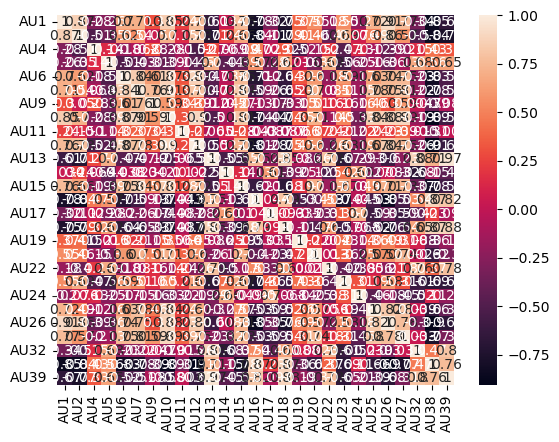

In [9]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

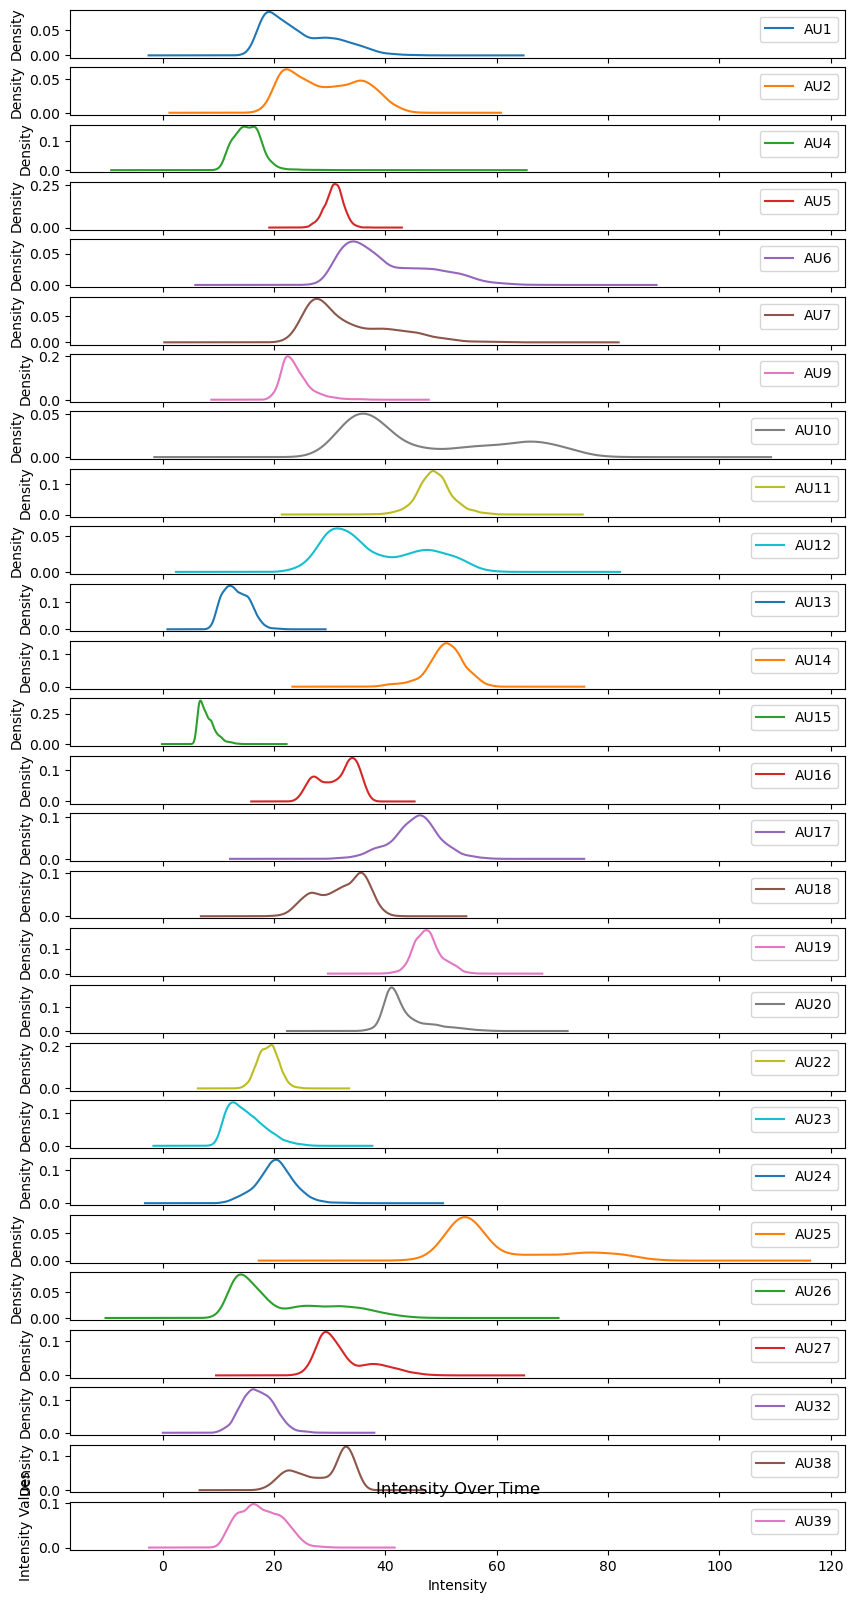

In [10]:
df.plot(kind='density', subplots=True, figsize=(10, 20))
plt.title('Intensity Over Time')
plt.xlabel('Intensity')
plt.ylabel('Intensity Values')
plt.show()